In [1]:
import pandas as pd
import os
import numpy as np
import cv2

In [2]:
label=[]

def get_all_csv_file_paths(folder_path):
    # List to store all jpg file paths
    jpg_file_paths = []

    # Walk through the directory
    for root, directories, files in os.walk(folder_path):
        for filename in files:
            # Check if the file is a .jpg file
            if filename.lower().endswith('.csv'):
                # Create the full file path and add it to the list
                file_path = os.path.join(root, filename)
                jpg_file_paths.append(file_path)

    return jpg_file_paths
paths=get_all_csv_file_paths(r'DISFA\labels_csv')

In [3]:
for path in paths:
    df=np.array(pd.read_csv(path))
    print(path,df.shape)

DISFA\labels_csv\RightVideoSN001.csv (4845, 12)
DISFA\labels_csv\RightVideoSN002.csv (4845, 12)
DISFA\labels_csv\RightVideoSN003.csv (4845, 12)
DISFA\labels_csv\RightVideoSN004.csv (4845, 12)
DISFA\labels_csv\RightVideoSN005.csv (4845, 12)
DISFA\labels_csv\RightVideoSN006.csv (4845, 12)
DISFA\labels_csv\RightVideoSN007.csv (4845, 12)
DISFA\labels_csv\RightVideoSN008.csv (4845, 12)
DISFA\labels_csv\RightVideoSN009.csv (4845, 12)
DISFA\labels_csv\RightVideoSN010.csv (4844, 12)
DISFA\labels_csv\RightVideoSN011.csv (4845, 12)
DISFA\labels_csv\RightVideoSN012.csv (4845, 12)
DISFA\labels_csv\RightVideoSN013.csv (4845, 12)
DISFA\labels_csv\RightVideoSN016.csv (4845, 12)
DISFA\labels_csv\RightVideoSN017.csv (4845, 12)
DISFA\labels_csv\RightVideoSN018.csv (4845, 12)
DISFA\labels_csv\RightVideoSN021.csv (4845, 12)
DISFA\labels_csv\RightVideoSN023.csv (4845, 12)
DISFA\labels_csv\RightVideoSN024.csv (4845, 12)
DISFA\labels_csv\RightVideoSN025.csv (4845, 12)
DISFA\labels_csv\RightVideoSN026.csv (48

In [23]:
import numpy as np 
from collections import Counter
df=np.array(pd.read_csv(paths[0]))
for file in paths[1:]:
    df1=np.array(pd.read_csv(file))
    df=np.vstack((df,df1))

In [33]:
d=pd.read_csv(paths[0])
col=d.columns
col

Index(['au1', 'au12', 'au15', 'au17', 'au2', 'au20', 'au25', 'au26', 'au4',
       'au5', 'au6', 'au9'],
      dtype='object')

In [8]:
def get_all_file_paths(folder_path):
    # List to store all jpg file paths
    jpg_file_paths = []

    # Walk through the directory
    for root, directories, files in os.walk(folder_path):
        for filename in files:
            # Check if the file is a .jpg file
            if True:
                # Create the full file path and add it to the list
                file_path = os.path.join(root, filename)
                jpg_file_paths.append(file_path)

    return jpg_file_paths
videos=get_all_file_paths(r'DISFA\Video_RightCamera')

In [9]:
# from feat import *
# def save_frames(video_path,folder):

#     # Desired frame rate for the output dataset
#     folder_name=video_path.split('\\')[-1].split('_')[0]
#     folder_path=os.path.join(folder,folder_name)
#     # Capture the video
#     cap = cv2.VideoCapture(video_path)
#     frame_count = 0
#     # Loop through the video
#     while True:
#         ret, frame = cap.read()
#         if not ret:
#             break
#         face=get_face(frame)
#         filename=os.path.join(folder_path,f'{frame_count}.jpg')
#         if face is not None:
#             cv2.imwrite(filename,face)
#         else:
#             print("error in capturing face : ",video_path,frame_count)
#         frame_count += 1
#     cap.release()


In [10]:
# from tqdm import tqdm
# for video in tqdm(videos):
#     save_frames(video,folder='frames')

In [11]:
def get_all_file_paths(folder_path):
    # List to store all jpg file paths
    jpg_file_paths = []

    # Walk through the directory
    for root, directories, files in os.walk(folder_path):
        for filename in files:
            # Check if the file is a .jpg file
            if True:
                # Create the full file path and add it to the list
                file_path = os.path.join(root, filename)
                jpg_file_paths.append(file_path)

    return jpg_file_paths
images=get_all_file_paths(r'frames')
import re
def extract_numbers(path):
    # Extract sequence number using regex
    seq_match = re.search(r'SN(\d+)', path)
    sequence_number = int(seq_match.group(1)) if seq_match else 0
    
    # Extract image number using regex
    img_match = re.search(r'(\d+)\.jpg$', path)
    image_number = int(img_match.group(1)) if img_match else 0
    
    return (sequence_number, image_number)

# Sort the image paths based on the extracted numeric part

image_paths = sorted(images, key=extract_numbers)

In [12]:
zero_rows  = np.where(~df.any(axis=1))[0]
non_zero_rows = np.where(df.any(axis=1))[0]
print("Count of Frames which have no action unit detected in them : ",len(zero_rows))
print("Count of Frames which have atleast one action unit detected in them : ",len(non_zero_rows))

Count of Frames which have no action unit detected in them :  48616
Count of Frames which have atleast one action unit detected in them :  82198


In [35]:
d.columns

Index(['au1', 'au12', 'au15', 'au17', 'au2', 'au20', 'au25', 'au26', 'au4',
       'au5', 'au6', 'au9'],
      dtype='object')

In [30]:
s=df[non_zero_rows]
s[s>=1]=1
counters=[]
for i in range(12):
    counters.append(Counter(s[:,i]))
print(counters)

[Counter({0: 73420, 1: 8778}), Counter({0: 51404, 1: 30794}), Counter({0: 74336, 1: 7862}), Counter({0: 69268, 1: 12930}), Counter({0: 74834, 1: 7364}), Counter({0: 77666, 1: 4532}), Counter({1: 46052, 0: 36146}), Counter({0: 57222, 1: 24976}), Counter({0: 57604, 1: 24594}), Counter({0: 79469, 1: 2729}), Counter({0: 62714, 1: 19484}), Counter({0: 75066, 1: 7132})]


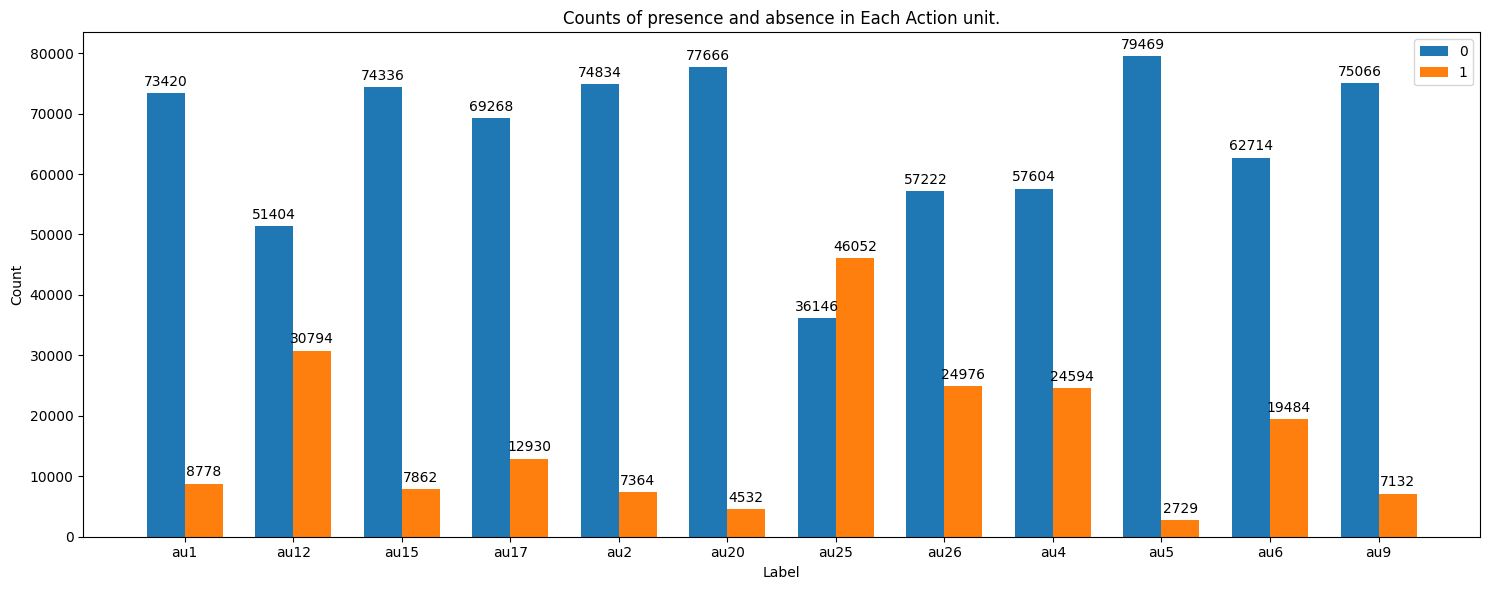

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the user
counters = [
    {0: 73420, 1: 8778}, {0: 51404, 1: 30794}, {0: 74336, 1: 7862}, 
    {0: 69268, 1: 12930}, {0: 74834, 1: 7364}, {0: 77666, 1: 4532}, 
    {1: 46052, 0: 36146}, {0: 57222, 1: 24976}, {0: 57604, 1: 24594}, 
    {0: 79469, 1: 2729}, {0: 62714, 1: 19484}, {0: 75066, 1: 7132}
]

# Extracting data for plotting
labels = list(range(1, 13))
counts_0 = [counter.get(0, 0) for counter in counters]
counts_1 = [counter.get(1, 0) for counter in counters]

# Plotting
x = np.arange(len(labels))  # label locations
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(15, 6))
bars1 = ax.bar(x - width/2, counts_0, width, label='0')
bars2 = ax.bar(x + width/2, counts_1, width, label='1')

# Adding labels, title and custom x-axis tick labels
ax.set_xlabel('Label')
ax.set_ylabel('Count')
ax.set_title('Counts of presence and absence in Each Action unit.')
ax.set_xticks(x)
ax.set_xticklabels(['au1', 'au12', 'au15', 'au17', 'au2', 'au20', 'au25', 'au26', 'au4',
       'au5', 'au6', 'au9'])
ax.legend()

# Adding count labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()


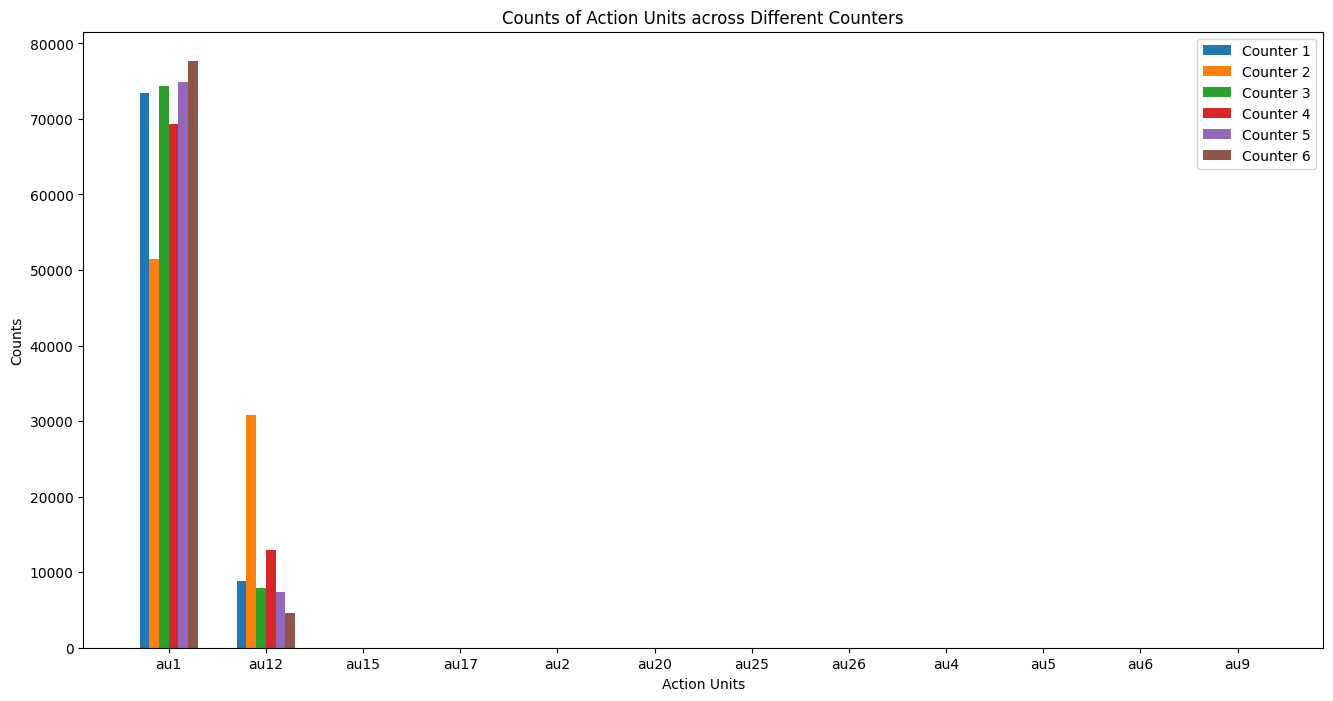

In [21]:
category_mapping = {0: 'au1', 1: 'au12', 2: 'au15', 3: 'au17', 4: 'au2', 5: 'au20'}
au_labels=col
import matplotlib.pyplot as plt
# Reformatting the counters
reformatted_data = {label: [] for label in au_labels}

for counter in counters:
    for category in range(6):
        action_unit = category_mapping[category]
        reformatted_data[action_unit].append(counter.get(category, 0))
    for action_unit in au_labels[6:]:
        reformatted_data[action_unit].append(0)

# Labels for x-axis
x = np.arange(len(au_labels))

# Width of each bar
bar_width = 0.1

# Plotting
plt.figure(figsize=(16, 8))

for i in range(6):
    values = [reformatted_data[label][i] for label in au_labels]
    plt.bar(x + i * bar_width, values, width=bar_width, label=f'Counter {i+1}')

# Add labels, title, and legend
plt.xlabel('Action Units')
plt.ylabel('Counts')
plt.title('Counts of Action Units across Different Counters')
plt.xticks(x + 2.5 * bar_width, au_labels)
plt.legend(loc='upper right')

plt.show()

In [35]:
for i in range(12):
    print(Counter(df[:,i]))

Counter({0: 122036, 3: 2809, 1: 2272, 2: 1749, 4: 1393, 5: 555})
Counter({0: 100020, 1: 13943, 3: 7233, 2: 6869, 4: 2577, 5: 172})
Counter({0: 122952, 1: 5180, 2: 1618, 3: 1017, 4: 47})
Counter({0: 117884, 1: 6342, 2: 4184, 3: 2281, 4: 112, 5: 11})
Counter({0: 123450, 3: 3505, 1: 1720, 2: 934, 4: 836, 5: 369})
Counter({0: 126282, 2: 1608, 1: 1591, 3: 1305, 4: 28})
Counter({0: 84762, 3: 15693, 2: 13935, 1: 9805, 4: 5580, 5: 1039})
Counter({0: 105838, 1: 13443, 2: 7473, 3: 3529, 4: 314, 5: 217})
Counter({0: 106220, 2: 7636, 3: 6586, 1: 4661, 4: 4328, 5: 1383})
Counter({0: 128085, 1: 1579, 2: 719, 3: 293, 4: 104, 5: 34})
Counter({0: 111330, 1: 9157, 2: 5986, 3: 3599, 4: 601, 5: 141})
Counter({0: 123682, 3: 3045, 2: 2035, 1: 1659, 4: 316, 5: 77})


array([[0, 2, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 3, 5],
       [0, 0, 0, ..., 0, 3, 5],
       [0, 0, 0, ..., 0, 3, 5]], dtype=int64)

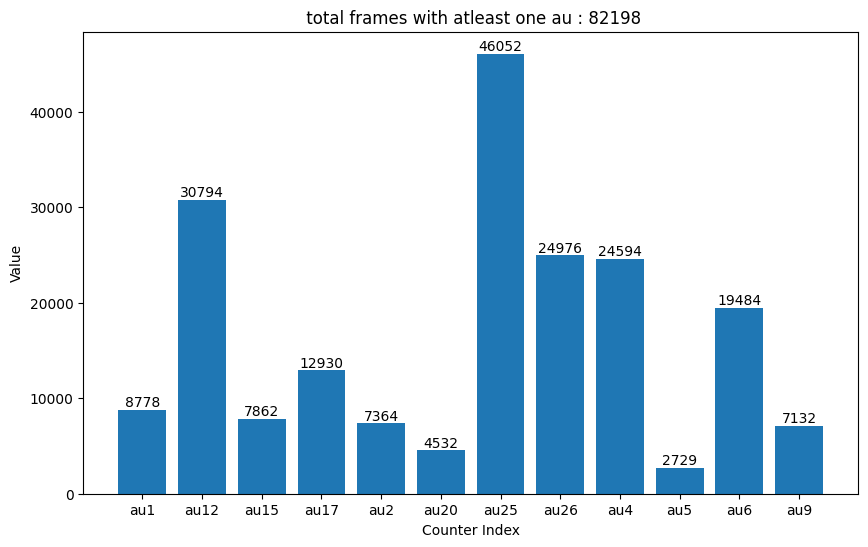

In [20]:
values_for_1 = [counter.get(1, 0) for counter in counters]

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(range(1, len(values_for_1) + 1), values_for_1, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')
ax.bar(range(1, len(values_for_1) + 1), values_for_1)
ax.set_title(f' total frames with atleast one au : {len(non_zero_rows)}')
ax.set_xlabel('Counter Index')
ax.set_ylabel('Value')
ax.set_xticks(range(1, len(values_for_1) + 1))
ax.set_xticklabels(col)
plt.show()

In [36]:
zero_samples = np.random.choice(zero_rows, size=30000, replace=False)

In [37]:
mask=np.concatenate((zero_samples,non_zero_rows))
mask.sort()

In [48]:
mask.shape

(112198,)

In [72]:
images=np.array(image_paths)
images.shape

(130814,)

In [74]:
sampled_images=images[mask]
sampled_df=df[mask]

In [75]:
sampled_df.shape,sampled_images.shape

((112198, 12), (112198,))

In [89]:
image_paths[6093]

'frames\\RightVideoSN002\\1248.jpg'

In [76]:
data=pd.DataFrame(sampled_df,columns=col)
data['paths']=sampled_images
data

,au1,au12,au15,au17,au2,au20,au25,au26,au4,au5,au6,au9,paths
0,0,2,0,0,0,0,0,0,0,0,0,0,frames\RightVideoSN001\0.jpg
1,0,2,0,0,0,0,0,0,0,0,0,0,frames\RightVideoSN001\1.jpg
2,0,2,0,0,0,0,0,0,0,0,0,0,frames\RightVideoSN001\2.jpg
3,0,2,0,0,0,0,0,0,0,0,0,0,frames\RightVideoSN001\3.jpg
4,0,2,0,0,0,0,0,0,0,0,0,0,frames\RightVideoSN001\4.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112193,0,0,0,0,0,0,3,0,5,0,3,5,frames\RightVideoSN032\4840.jpg
112194,0,0,0,0,0,0,3,0,5,0,3,5,frames\RightVideoSN032\4841.jpg
112195,0,0,0,0,0,0,3,0,5,0,3,5,frames\RightVideoSN032\4842.jpg
112196,0,0,0,0,0,0,3,0,5,0,3,5,frames\RightVideoSN032\4843.jpg


In [92]:
data.to_csv('labels_path.csv',index=False)

In [33]:
import os

def create_folders(base_path, folder_names):
    """
    Create multiple folders inside the base_path directory.

    Parameters:
    - base_path: The path where the folders will be created.
    - folder_names: A list of folder names to be created.
    """
    # Check if the base path exists
    if not os.path.exists(base_path):
        print(f"Base path {base_path} does not exist.")
        return

    for folder_name in folder_names:
        folder_path = os.path.join(base_path, folder_name)
        
        # Create the folder if it does not exist
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)
            print(f"Created folder: {folder_path}")
        else:
            print(f"Folder already exists: {folder_path}")

# Example usage
base_directory = 'final_images'
folders_to_create = os.listdir('frames')

create_folders(base_directory, folders_to_create)


Created folder: final_images\RightVideoSN001
Created folder: final_images\RightVideoSN002
Created folder: final_images\RightVideoSN003
Created folder: final_images\RightVideoSN004
Created folder: final_images\RightVideoSN005
Created folder: final_images\RightVideoSN006
Created folder: final_images\RightVideoSN007
Created folder: final_images\RightVideoSN008
Created folder: final_images\RightVideoSN009
Created folder: final_images\RightVideoSN010
Created folder: final_images\RightVideoSN011
Created folder: final_images\RightVideoSN012
Created folder: final_images\RightVideoSN013
Created folder: final_images\RightVideoSN016
Created folder: final_images\RightVideoSN017
Created folder: final_images\RightVideoSN018
Created folder: final_images\RightVideoSN021
Created folder: final_images\RightVideoSN023
Created folder: final_images\RightVideoSN024
Created folder: final_images\RightVideoSN025
Created folder: final_images\RightVideoSN026
Created folder: final_images\RightVideoSN027
Created fo

In [35]:
folder='final_images'
from tqdm import tqdm 
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
for i in tqdm(range(df.shape[0])):
    img=cv2.imread(df.at[i,'paths'],0)
    img = clahe.apply(img)

    file=df.at[i,'paths'].split('\\')[1:]
    file=os.path.join(file[0],file[1])
    output_path=os.path.join(folder,file)

    cv2.imwrite(output_path, img, [int(cv2.IMWRITE_JPEG_QUALITY),50])

100%|██████████| 112198/112198 [05:16<00:00, 354.76it/s]


preprocessing

In [ ]:
df=pd.read_csv('labels_path.csv')
paths=df['paths']
from tqdm import tqdm

In [ ]:
paths=[path.replace('frames','final_images') for path in paths]
paths[:5]

['final_images\\RightVideoSN001\\0.jpg',
 'final_images\\RightVideoSN001\\1.jpg',
 'final_images\\RightVideoSN001\\2.jpg',
 'final_images\\RightVideoSN001\\3.jpg',
 'final_images\\RightVideoSN001\\4.jpg']

In [ ]:
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
for path in tqdm(paths):
    img = cv2.imread(path,0)
    clahe_img = clahe.apply(img)
    cv2.imwrite(path,clahe_img)


  9%|▉         | 9985/112198 [01:01<10:26, 163.12it/s]


KeyboardInterrupt: 

In [2]:
import os 
folder='final_images'
folders=os.listdir(folder)

In [4]:
for f in folders:
    path=os.path.join(folder,f)
    print(path,len(os.listdir(path)))

final_images\RightVideoSN001 3683
final_images\RightVideoSN002 4035
final_images\RightVideoSN003 4529
final_images\RightVideoSN004 4579
final_images\RightVideoSN005 3934
final_images\RightVideoSN006 4127
final_images\RightVideoSN007 3929
final_images\RightVideoSN008 3794
final_images\RightVideoSN009 3383
final_images\RightVideoSN010 3929
final_images\RightVideoSN011 4818
final_images\RightVideoSN012 4449
final_images\RightVideoSN013 3760
final_images\RightVideoSN016 4746
final_images\RightVideoSN017 4123
final_images\RightVideoSN018 4463
final_images\RightVideoSN021 3957
final_images\RightVideoSN023 4552
final_images\RightVideoSN024 3743
final_images\RightVideoSN025 4842
final_images\RightVideoSN026 3789
final_images\RightVideoSN027 4093
final_images\RightVideoSN028 4109
final_images\RightVideoSN029 4601
final_images\RightVideoSN030 3926
final_images\RightVideoSN031 3938
final_images\RightVideoSN032 4367
